# Color maps of UV-CDAT<a id=top><a>

- Grep all available color maps and visualize them using EzTemplate
- [Download Jupyter Notebook ipynb](./Colormap_Tutorial.ipynb)
<div align='right'>Jiwoo Lee, LLNL, 2017. Sep.</div>

# Contents
- [Import modules](#modules)
- [Prepare a dummy array](#array)
- [Colormap visualizing function](#function)
- [Open a VCS canvas](#canvas)
- [VCS colormaps](#vcs)
- [Matplotlib colormaps in VCS](#matplotlib)

# Import modules<a id=modules></a>
[(top)](#top)

In [1]:
import vcs, EzTemplate
import MV2
import numpy as np

# Prepare a dummy array<a id=array></a>
[(top)](#top)
- We need a 2-D dummy array that will contain monotonically increasing numbers each of two rows, to be used for the visualization

In [2]:
a=[]
num_levels = 224

for i in range(0,num_levels):
  a.append(i/float(num_levels))

for i in range(0,num_levels):
  a.append(i/float(num_levels))

a = MV2.array(a)
a = MV2.reshape(a, (-1,num_levels))

# Colormap visualizing function<a id=function></a>
[(top)](#top)

- Below function will visualize given colormaps to provide a selection guidance.

In [3]:
def visualize(cmlst, v, loadcmap):
 
    T = vcs.createtemplate()
    T.blank(['title','mean','min','max','dataname','crdate','crtime',
         'units','zvalue','tvalue','xunits','yunits','xname','yname', 'legend'])

    cmlst_num = len(cmlst)
    nrows = int(round(cmlst_num/2.))
    
    M = EzTemplate.Multi(template=T, rows=nrows, columns=2)
    M.margins.top = 0.05
    M.margins.bottom = 0.05
    M.margins.left = 0.2
    M.margins.right = 0.2
    M.spacing.vertical= 0.005
    
    for i in range(0, cmlst_num):
        box = v.createboxfill()
        box.color_1 = 16
        box.color_2 = 240
        box.xticlabels('','') # Hide x-axis tick labels
        box.yticlabels('','') # Hide y-axis tick labels
        box.colormap = loadcmap(cmlst[i])
    
        if i >= nrows: #right column
            jj=1
            ii=i-nrows
            x = 0.81 # text starting x position
        else: # left column
            jj=0
            ii=i
            x = 0.01 # text starting x position

        t = M.get(row=ii, column=jj, legend='none')
        t.blank(['legend'])

        v.plot(a, t, box, bg=1)

        subplot_title = vcs.createtext()
        subplot_title.string = box.colormap
        subplot_title.x = x
        subplot_title.y = (t.box1.y1 + t.box1.y2) / 2.
        subplot_title.height = 8
        subplot_title.halign = 'left'
        subplot_title.valign = 'half'
        subplot_title.color = 'black'
        v.plot(subplot_title, t)
        v.removeobject(box)
        v.removeobject(subplot_title)
        
        #print box.colormap  ## List available color maps
    return(v)

# Open a VCS canvas<a id=canvas></a>
[(top)](#top)

- Let's open a VCS canvas to play with!

In [4]:
v = vcs.init(geometry={"width":600,"height":1200}, bg=1)
vcs.utils.defaultColorsRange = range(16,240)

# VCS colormaps <a id=vcs></a>
[(top)](#top)

- VCS is default module that is being used for the UV-CDAT. You can use VCS color maps which is loaded at the beginning.

/Users/lee1043/anaconda2/envs/uvcdat-2.12/lib/python2.7/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/Users/lee1043/anaconda2/envs/uvcdat-2.12/lib/python2.7/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


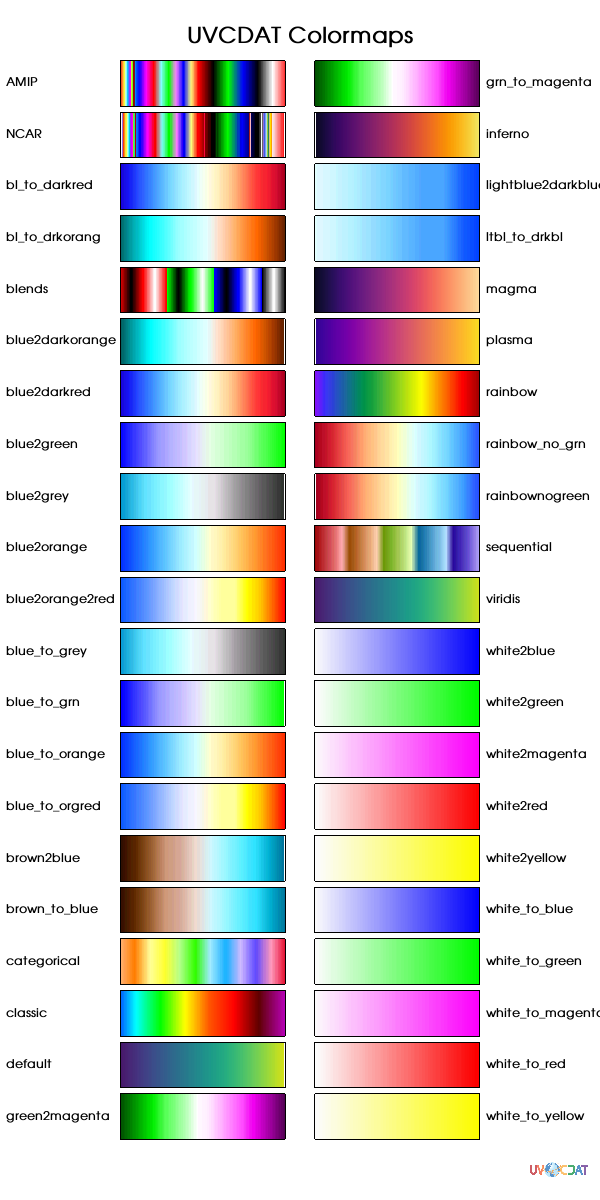

In [5]:
cmlst = v.listelements('colormap')
loadcmap = str
v = visualize(cmlst, v, loadcmap)

plot_title = v.createtext()
plot_title.string = 'VCS Colormaps'
plot_title.height = 15
plot_title.halign = 'center'
plot_title.valign = 'bottom'
plot_title.x = 0.5
plot_title.y = 0.96
v.plot(plot_title)

# Matplotlib colormaps in VCS<a id=matplotlib></a>
[(top)](#top)

- You can load and visualize [Matplotlib colormaps](#https://matplotlib.org/examples/color/colormaps_reference.html) in the VCS canvas.
- Use [vcs.colors.matplotlib2vcs](https://uvcdat.llnl.gov/docs/vcs/misc/colors.html) to convert 
- For now if same name is already being used in VCS, new name with tail `_000` is assigned, as showing below as "warning messages".
- You can also use `vcs.utils.loadmatplotlibcolormaps()` to bring all Matplotlib colormaps to VCS

/Users/lee1043/anaconda2/envs/uvcdat-2.12/lib/python2.7/site-packages/vcs/colors.py:38: UserWarning: inferno colormap name was already existing, your colormap name will be: inferno_mpl_000
  (vcs_name, vcs_name_final))
/Users/lee1043/anaconda2/envs/uvcdat-2.12/lib/python2.7/site-packages/vcs/colors.py:38: UserWarning: magma colormap name was already existing, your colormap name will be: magma_mpl_000
  (vcs_name, vcs_name_final))
/Users/lee1043/anaconda2/envs/uvcdat-2.12/lib/python2.7/site-packages/vcs/colors.py:38: UserWarning: plasma colormap name was already existing, your colormap name will be: plasma_mpl_000
  (vcs_name, vcs_name_final))
/Users/lee1043/anaconda2/envs/uvcdat-2.12/lib/python2.7/site-packages/vcs/colors.py:38: UserWarning: rainbow colormap name was already existing, your colormap name will be: rainbow_mpl_000
  (vcs_name, vcs_name_final))
/Users/lee1043/anaconda2/envs/uvcdat-2.12/lib/python2.7/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The s

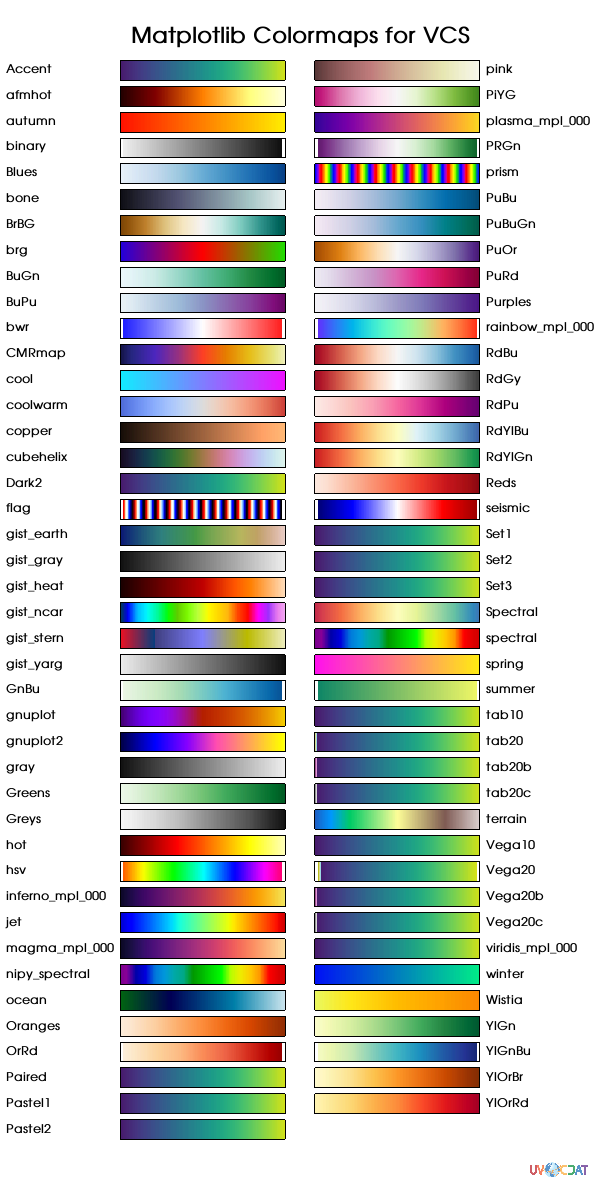

In [6]:
v.clear()

import matplotlib.pyplot as plt

# Get list of all available colormaps from matplotlib (except '_r' which is reversed one)
cmlst = [x for x in plt.colormaps() if not '_r' in x]
cmlst = sorted(cmlst, key=lambda s: s.lower()) # Sort as case-insensitive alphabet order

loadcmap = vcs.colors.matplotlib2vcs
v = visualize(cmlst, v, loadcmap)

plot_title.string = 'Matplotlib Colormaps for VCS'
v.plot(plot_title)